In [171]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sooyoungher/california-housing")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Playdata\.cache\kagglehub\datasets\sooyoungher\california-housing\versions\1


# 단층 퍼셉트론 기반 선형 회귀 모델

In [172]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [173]:
df = pd.read_csv('data/fetch_california_housing.csv')
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


| 변수명       | 설명                                  | 단위 / 비고               |
|--------------|---------------------------------------|---------------------------|
| MedInc       | 중간 소득                             | 10,000달러                |
| HouseAge     | 주택의 나이                           | 연도                      |
| AveRooms     | 평균 방 개수                          | 개수                      |
| AveBedrms    | 평균 침실 개수                        | 개수                      |
| Population   | 각 구역의 인구 수                     | 명                        |
| AveOccup     | 가구당 평균 거주자 수                 | 명                        |
| Latitude     | 각 구역의 위도                        | 도(degree)                |
| Longitude    | 각 구역의 경도                        | 도(degree)                |
| MedHouseVal  | 중간 주택 가치 (Target)               | 10,000달러 (타깃 변수)    |


In [174]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


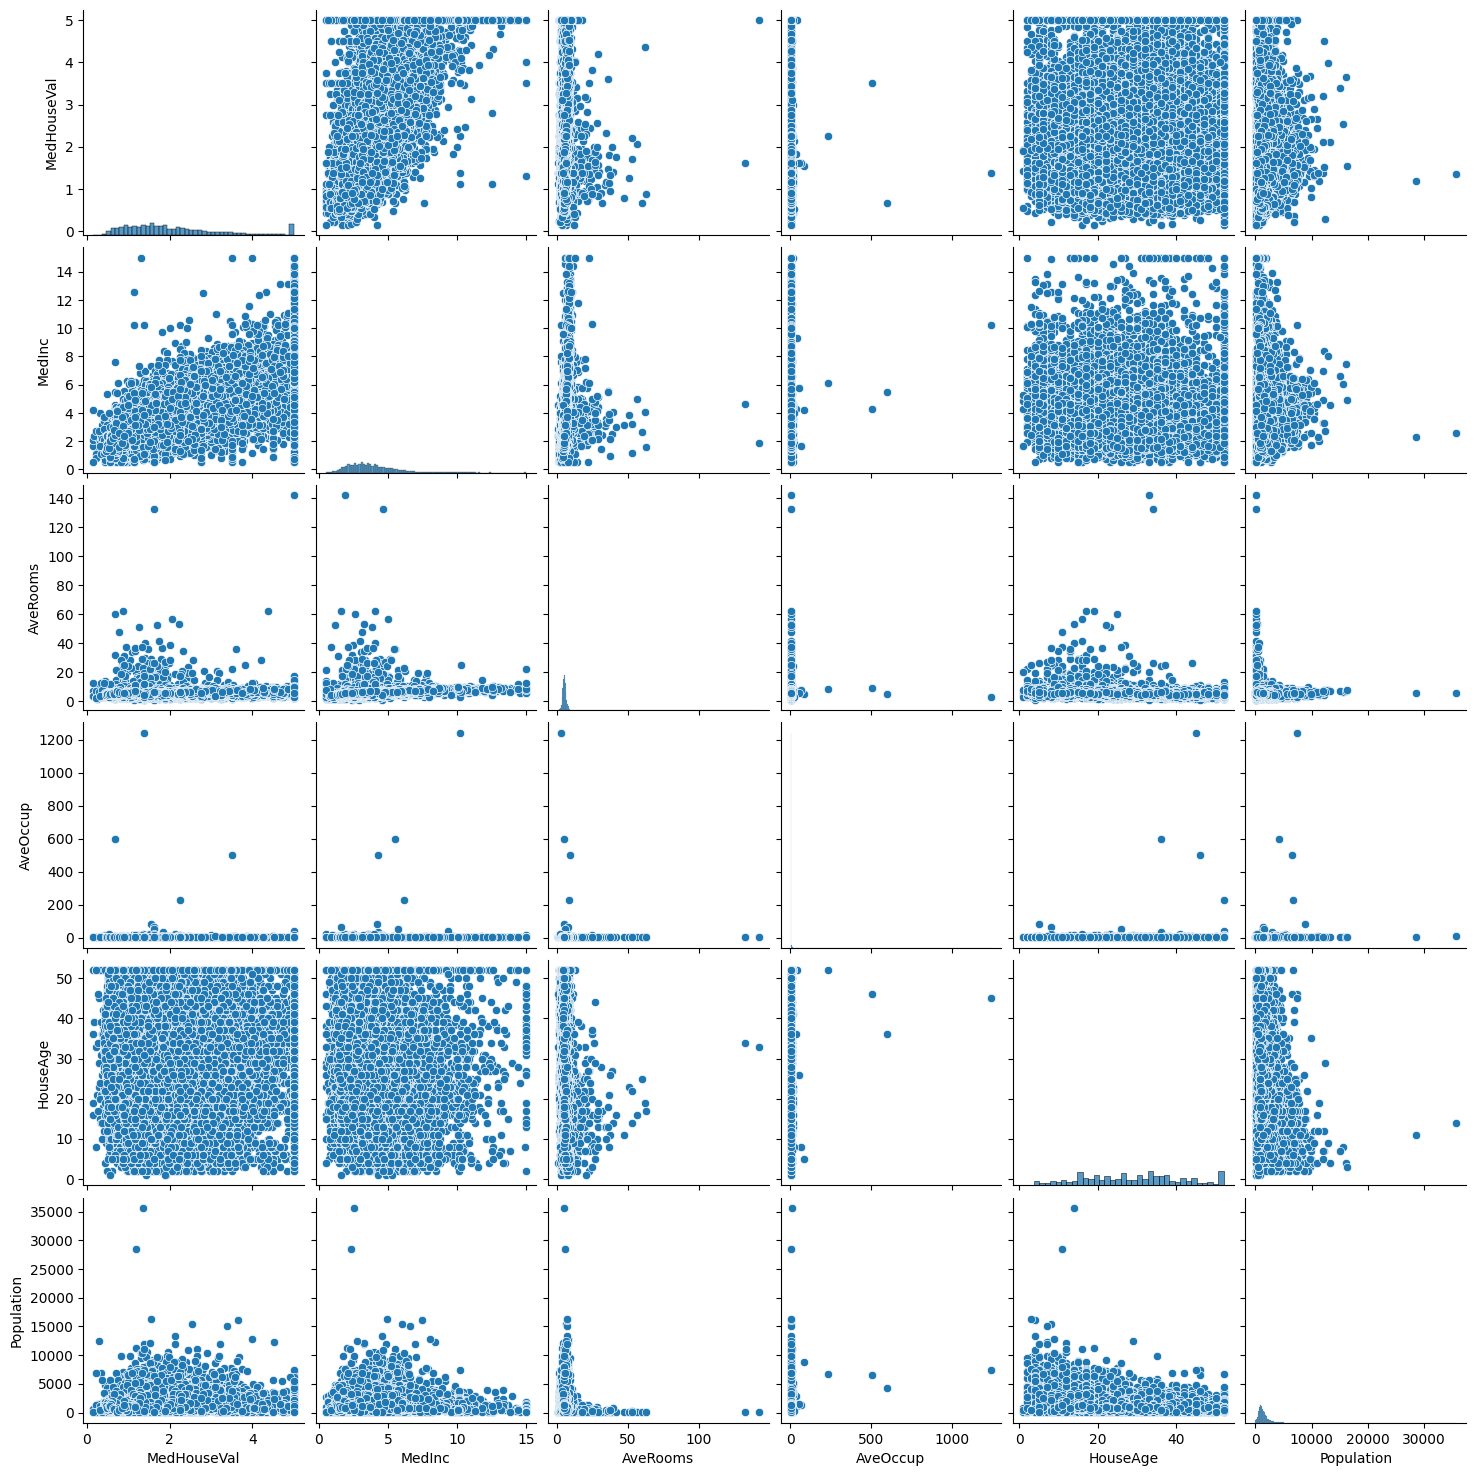

In [175]:
cols = ['MedHouseVal', 'MedInc', 'AveRooms', 'AveOccup', 'HouseAge', 'Population']

sns.pairplot(df[cols])
plt.show()

pytorch로 선형 모델 학습

In [176]:
import torch                        # 텐서 및 기본 연산 지원
import torch.nn as nn               # 신경망 모델 구성 도구(nn.Linear, nn.Sequential 등)
import torch.nn.functional as F     # 다양한 함수형 연산 지원 (F.relu, F.mse_loss)
import torch.optim as optim         # 최적화 알고리즘 (SGD, ADAM 등) 



In [177]:
data = torch.from_numpy(df[cols].values).float()
data.shape

torch.Size([20640, 6])

In [178]:
# df[cols]의 값을 numpy 배열로 변환 후에 이를 floatTensor() 형태로 변환했다.
data = torch.from_numpy(df[cols].values).float()

print(data.shape)
print(data.size())

torch.Size([20640, 6])
torch.Size([20640, 6])


In [179]:
# 입력변수 x와 타겟값 y를 분리 (범위형 분리로 차원 shape 유지)
x = data[:, 1:] # 입력 변수
y = data[:, :1] # 타겟값
x_min = x.min(dim=0, keepdim=True).values   # (dim=0으로 행을 기준) 열별 최소값
x_max = x.max(dim=0, keepdim=True).values   # (dim=1으로 열을 기준)열별 최대값
x = (x-x_min) / (x_max - x_min) # x값을 0~1 사이로 만들어주는 minmax scaler와 동일한 효과

print(x.shape, y.shape)

torch.Size([20640, 5]) torch.Size([20640, 1])


In [180]:
x.min(dim=0, keepdim=True).values

tensor([[0., 0., 0., 0., 0.]])

### 모델 학습을 위한 하이퍼 파라미터 설정

In [181]:
n_epochs = 2000         # 전체 학습 봔복 횟수
learning_rate = 1e-3    # 학습률 : 파라미터를 얼마나 빠르게 업데이트 할지 결정한다.
print_interval = 100    # 학습 중 손실(loss)을 출력할 간격 (몇 epoch마다 출력할지)

In [182]:
# 모델 정의
model = nn.Linear(x.size(-1), y.size(-1))       # 입력은 5개, 출력은 1

model

Linear(in_features=5, out_features=1, bias=True)

In [183]:
# optimizer (최적화 함수): 모델의 파라미터를 자동으로 업데이트 해준다.
# .backward()와 optimizer.step()을 통해 자동으로 파라미터 업데이트
optimizer = optim.SGD(  # 확률적 경사 하강법 SGD
    model.parameters(), # 학습 대상이 되는 모델의 가중치와 편향
    lr = learning_rate  # 학습률
)

In [184]:
for i in range(1000):
    y_hat = model(x)    # 순전파
    loss = F.mse_loss(y_hat,y)

    optimizer.zero_grad()   # 기울기 초기화
    loss.backward()         # 역전파

    optimizer.step()        # 파라미터 업데이트

    if(i+1) % print_interval == 0: # 100번 돌때마다
            print(f"Epoch{i+1}: loss={loss:.4e}") # 소수점 4자리의 지수표현식으로 표현


Epoch100: loss=4.3175e+00
Epoch200: loss=2.9991e+00
Epoch300: loss=2.2339e+00
Epoch400: loss=1.7892e+00
Epoch500: loss=1.5301e+00
Epoch600: loss=1.3785e+00
Epoch700: loss=1.2891e+00
Epoch800: loss=1.2358e+00
Epoch900: loss=1.2033e+00
Epoch1000: loss=1.1830e+00


In [185]:
print(y.size())
print(y_hat.size())

torch.Size([20640, 1])
torch.Size([20640, 1])


```
torch.cat([y,y_hat],dim=1) : 예측값과 실제값을 열방향으로 이어붙임
detach().numpy() : 텐서는 기본적으로 계산 그래프가 같이 나오는데 이를 detach()로 분리하고, 넘파이 배열로 값만 반환
```

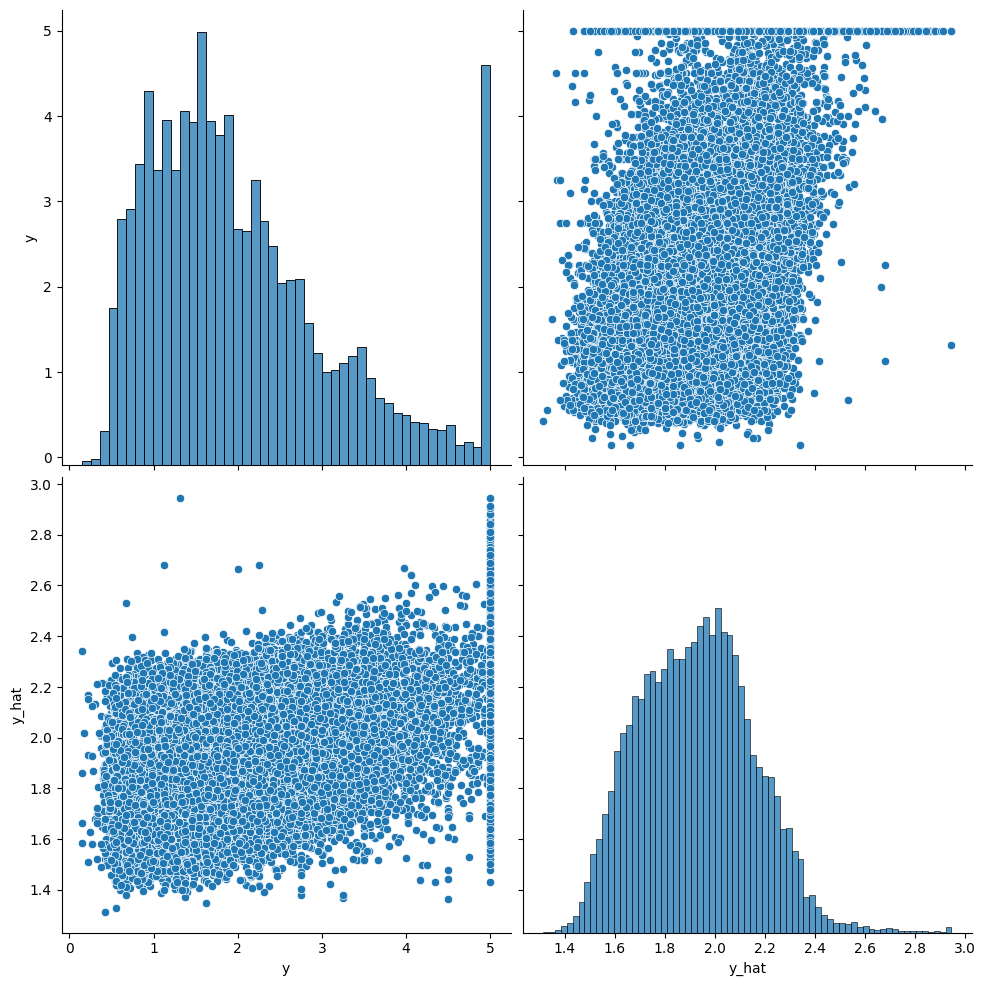

In [186]:
df = pd.DataFrame(torch.cat([y, y_hat], dim = 1).detach().numpy(),columns = ["y","y_hat"])


sns.pairplot(df, height= 5)
plt.show()

선형 모델로 어느정도는 예측 가능했으나, 역시나 가격이 높은 줕캑에 대해서는 과소평가 하고 있다.